Pipeline Code:
[
  {
    $project: {
      runtime: {
        $convert: {
          input: "$runtime",
          to: "int",
          onError: null,
        },
      },
      user_rating: {
        $convert: {
          input: "$user_rating",
          to: "int",
          onError: null,
        },
      },
      votes: {
        $convert: {
          input: "$votes",
          to: "int",
          onError: null,
        },
      },
      budget: {
        $convert: {
          input: "$budget",
          to: "int",
          onError: null,
        },
      },
      opening_weekend: {
        $convert: {
          input: "$opening_weekend",
          to: "int",
          onError: null,
        },
      },
      gross_sales: {
        $convert: {
          input: "$gross_sales",
          to: "int",
          onError: null,
        },
      },
      genresTrimmed: {
        $map: {
          input: {
            $split: ["$genres", ","],
          },
          as: "genresTrimmed",
          in: {
            $trim: {
              input: "$$genresTrimmed",
            },
          },
        },
      },
      castTrimmed: {
        $map: {
          input: {
            $split: ["$cast", ","],
          },
          as: "castTrimmed",
          in: {
            $trim: {
              input: "$$castTrimmed",
            },
          },
        },
      },
      directorTrimmed: {
        $map: {
          input: {
            $split: ["$director", ","],
          },
          as: "directorTrimmed",
          in: {
            $trim: {
              input: "$$directorTrimmed",
            },
          },
        },
      },
      producerTrimmed: {
        $map: {
          input: {
            $split: ["$producer", ","],
          },
          as: "producerTrimmed",
          in: {
            $trim: {
              input: "$$producerTrimmed",
            },
          },
        },
      },
      companyTrimmed: {
        $map: {
          input: {
            $split: ["$company", ","],
          },
          as: "companyTrimmed",
          in: {
            $trim: {
              input: "$$companyTrimmed",
            },
          },
        },
      },
      mpaa_rating: {
        $map: {
          input: {
            $split: ["$mpaa_rating", "::"],
          },
          as: "mpaa_rating",
          in: {
            $trim: {
              input: "$$mpaa_rating",
            },
          },
        },
      },
      release_date: {
        $convert: {
          input: "$release_date",
          to: "date",
          onError: null,
        },
      },
    },
  },
  {
    $addFields:
      /**
       * newField: The new field name.
       * expression: The new field expression.
       */
      {
        firstmpaa: {
          $arrayElemAt: ["$mpaa_rating", 0],
        },
      },
  },
]

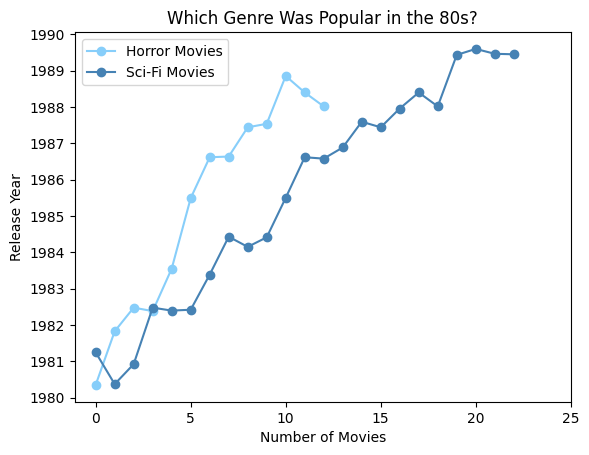

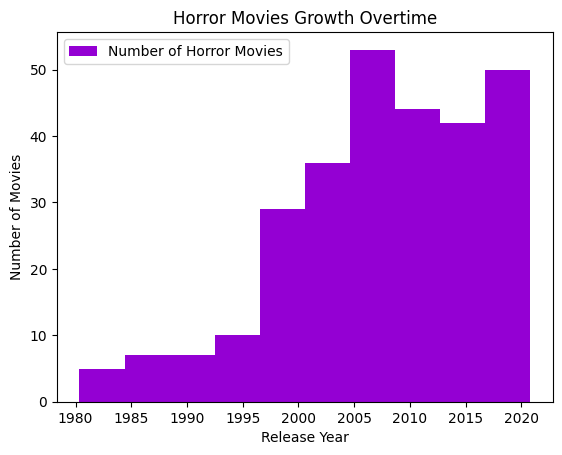

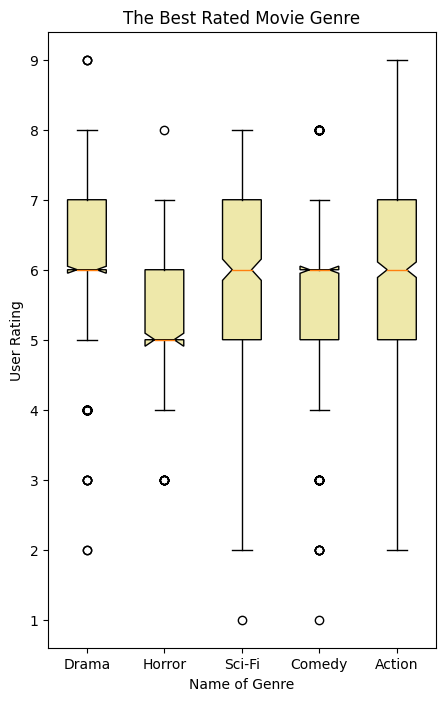

In [57]:
from datetime import datetime #it is needed for the date filter in mongodb. Source: https://www.dotnetperls.com/datetime-mongodb
from datetime import timezone
import json
import matplotlib.pyplot as plt
import pandas as pd
import pymongo #this library is to connect mongodb to python
import certifi

#Credit to Professor Ted Spencer for the code
# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('C:\\Users\\amann\\Desktop\\Bellevue College\\Spring 2023\\DA320\\Week 06\\Secrets.json') as f:
    data = json.load(f)
    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key = data ['mongodb_info']
# Once you have retrieved your connection string from a secrets file, use it here
# this is used to establish a connection between python through jupyter notebooks & mongodb, by using the library 'pymongo'
# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())
# Fetch the database named "DA320"
da320_database = client['DA320_Week05']
# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()
pipeline = da320_database["Superhero_Movies_View"]
collection= da320_database["superhero_movies_load"]



#used to apply "horror" filter on genresTrimmed for movies between 1980-1990
filter1= da320_database["Superhero_Movies_View"].find({
    'genresTrimmed': {
        '$in': [
            'Horror'
        ]
    }, 
    'release_date': {
        '$gt': datetime(1980, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
        '$lt': datetime(1990, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
    }
}) 
# to transform it into pandas
horror_movies=pd.DataFrame(filter1)

#used to apply "sci-fi" filter on genresTrimmed for movies between 1980-1990
filter2= da320_database["Superhero_Movies_View"].find({
    'genresTrimmed': {
        '$in': [
            'Sci-Fi'
        ]
    }, 
    'release_date': {
        '$gt': datetime(1980, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
        '$lt': datetime(1990, 1, 1, 0, 0, 0, tzinfo=timezone.utc)
    }
})
# to transform it into pandas
scifi_movies=pd.DataFrame(filter2)

# To plot and compare the released horror movies and sci-fi movies in the 80s
#Colors can be found on: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
#Markers can be found on: https://www.tutorialspoint.com/how-can-i-plot-a-single-point-in-matplotlib-python?key=range+of+ticks
# Set up labels on the axes
plt.title('Which Genre Was Popular in the 80s?')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.plot(horror_movies['release_date'], label="Horror Movies", color= 'lightskyblue', marker="o")
plt.plot(scifi_movies['release_date'], label="Sci-Fi Movies", color='steelblue', marker="o")
plt.xticks(range(0, 30, 5))
plt.legend()
plt.show()




#To filter out horror movies then assign them to pandas dataframe
filter3= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Horror'
})
horror_growth= pd.DataFrame(filter3)

#To plot horror movies growth overtime
plt.title('Horror Movies Growth Overtime')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.hist(horror_growth['release_date'], label="Number of Horror Movies", color='darkviolet')
plt.legend()
plt.show()




#Used to filter out movies then assign them to pandas dataframe
filter4= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Drama'
})

filter5= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Horror'
})

filter6= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Action'
})

filter7= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Sci-Fi'
})

filter8= da320_database['Superhero_Movies_View'].find({
    'genresTrimmed': 'Comedy'
})
drama=pd.DataFrame(filter4)
horror=pd.DataFrame(filter5)
action=pd.DataFrame(filter6)
scifi=pd.DataFrame(filter7)
comedy=pd.DataFrame(filter8)




#The genre with the best ratings graph
#Credit to Keith Galli for this useful tutorial on plotting in general. Link: https://youtu.be/0P7QnIQDBJY
labels=["Drama","Horror", "Sci-Fi", "Comedy", "Action"]
#to set the size of the figure
plt.figure(figsize=(5,8))
boxes= plt.boxplot([drama['user_rating'], horror['user_rating'], scifi['user_rating'], comedy['user_rating'], action['user_rating']], labels=labels, notch=True, vert=True,patch_artist=True)
#to set the color of the boxes in the box plot
for box in boxes['boxes']:
    box.set(facecolor='palegoldenrod')
plt.title('The Best Rated Movie Genre')
plt.xlabel('Name of Genre')
plt.ylabel('User Rating')
plt.show()


- The first graph represents the production of horror movies vs sci-fi movies since they were the most popular genre of films during the 80s. Horror films were famous, reaching almost 10 total releases in between 1988-1989 but then seemed to have a drop in production. On the other hand, Sci-Fi films weren't that popular in the early 80s, but did reach their peak in production during the late 80s, having total 22-23 movies released until 1989-1990. From the graph, it can be seen that horror movies were popular but not as popular as sci-fi movies in production.

- The second graph shows us the overall popularity in horror movie production. It demonstrates that they weren't popular during the 80s, but started to grow rapidly during the mid/late 90s, reaching their peak in the mid/late 2000s.

- The third graph represents different movie genres and their overall rating. Most of the movies, besides horror movies, had an average rating of 6/10, while horror movies had an average of 5/10. Sci-Fi movies tend also not to have such a good rating, falling below 6 and almost reaching 2 in some cases, meanwhile action movies had better ratings, ranging from 2 until 9. Does this mean that sci-fi movies aren't as great as action movies in production? Probably could mean so. Drama movies had an okay overall rating, with barely any outliers before the rating of 5, very close to the overall rating of comedy movies.
So from this graph we can understand that:
    - Action movies tend to get the best ratings out of all the movie genres, following it sci-fi and drama movies.
    - Drama and comedy movies tend to be average in rating
    - Horror movies tend to be the lowest in rating